<a href="https://colab.research.google.com/github/FaiyKhalid/3D-/blob/main/Stroke%20Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Analysis Preparation**

  ### **import libraries**


1. Pandas
2. Numpy  
3. Matplotlib
4. Seaborn 




In [ ]:
# Import all libraries needed in analysis
import pandas as pd # data processing, CSV file - Dataframe
import numpy as np # linear algebra - Arraies
import matplotlib.pyplot as plt # plotting - Visualization 
import seaborn as sns # Visualization 
from datetime import datetime
%matplotlib inline 

# **Data Wrangling**



# **General Properties**

In [ ]:
df=pd.read_csv("Data.csv") # Load dataset anto a dataframe

In [ ]:
df.head() # Shows the first 5 rows of data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# **Exploring general properties about the data**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


**Outcomes:**

This shows that we have 12 columns in total besides index, and we have 5110 entrise.
1. None of the data fields have NULL values.
2. age is float while it supposed to be an integer.


In [ ]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [ ]:
# Check Duplicates
df.duplicated().sum()

0


**There is no duplicate rows in this dataset.**

# **Understand Nature of each field in datase**

In [ ]:
df.describe(include="all") # Get statistical data about each column

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110,5110.000000,5110.000000,5110.000000,5110,5110,5110,5110.000000,4909.000000,5110,5110.000000
unique,NaN,3,NaN,NaN,NaN,2,5,2,NaN,NaN,4,NaN
top,NaN,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,NaN,2994,NaN,NaN,NaN,3353,2925,2596,NaN,NaN,1892,NaN
mean,36517.829354,NaN,43.226614,0.097456,0.054012,NaN,NaN,NaN,106.147677,28.893237,NaN,0.048728
std,21161.721625,NaN,22.612647,0.296607,0.226063,NaN,NaN,NaN,45.283560,7.854067,NaN,0.215320
min,67.000000,NaN,0.080000,0.000000,0.000000,NaN,NaN,NaN,55.120000,10.300000,NaN,0.000000
25%,17741.250000,NaN,25.000000,0.000000,0.000000,NaN,NaN,NaN,77.245000,23.500000,NaN,0.000000
50%,36932.000000,NaN,45.000000,0.000000,0.000000,NaN,NaN,NaN,91.885000,28.100000,NaN,0.000000
75%,54682.000000,NaN,61.000000,0.000000,0.000000,NaN,NaN,NaN,114.090000,33.100000,NaN,0.000000


Outcomes:

1. Age has a one or more negative value, so it need to be removed.


2. Age variate from 0.08 to 82 so we have a wide range of ages to investigate.

3. "hypertension","heart_disease", "stroke",  are encoded in form of zeros and ones, thats why it has type of int64, and appears like a continous data type.



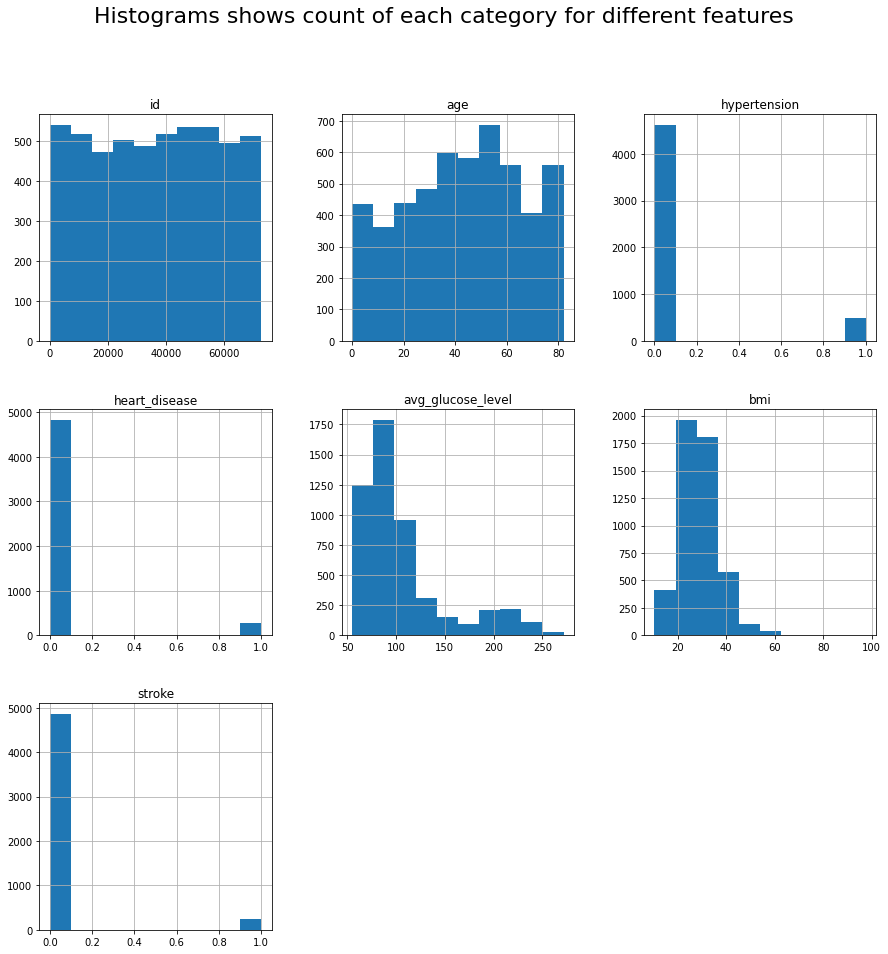

In [ ]:
# Draw Histogram to show distribution of data for each feature
df.hist(figsize=(15,15))
plt.suptitle('Histograms shows count of each category for different features', fontsize=22);

**Outcomes:**

1. data in age includes more meddal and old patients than young

2. peresentage of heart_disease, stroke, and hypertension doesn't exceed 5%



# **Data Cleaning**

Edit the "smoking_status" Column to be in Positive form instead of Negative:

1. **Detecting Nan Values**


In [ ]:
df.isnull().sum()

id                      0
gender                  0
age                     0
hypertension            0
heart_disease           0
ever_married            0
work_type               0
Residence_type          0
avg_glucose_level       0
bmi                   201
smoking_status       5110
stroke                  0
dtype: int64

In [ ]:
df.isnull().any()

id                   False
gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                   True
smoking_status        True
stroke               False
dtype: bool

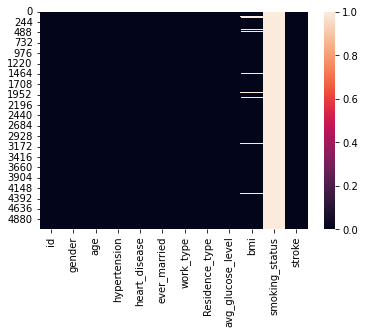

In [ ]:
sns.heatmap(df.isnull(), annot=False)

### **outcome** 
**It describe where we have Nan Values which are smoking_status and bmi**

2. **Remove Nan values**

In [ ]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,NaN,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,NaN,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,NaN,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,NaN,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,NaN,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,NaN,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,NaN,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,NaN,0


In [ ]:
df.dropna(how='all')

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,NaN,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,NaN,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,NaN,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,NaN,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,NaN,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,NaN,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,NaN,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,NaN,0


In [ ]:
df["ever_married"].replace({"Yes":0,"No":1},inplace=True)

In [ ]:
df["ever_married"] = pd.to_numeric(df["ever_married"])

In [ ]:
df=df.rename(columns={"ever_married":"married"})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   married            5110 non-null   int64  
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     0 non-null      float64
 11  stroke             5110 non-null   int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 479.2+ KB


In [ ]:
df.head()

,id,gender,age,hypertension,heart_disease,married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,0,Private,Urban,228.69,36.6,NaN,1
1,51676,Female,61.0,0,0,0,Self-employed,Rural,202.21,NaN,NaN,1
2,31112,Male,80.0,0,1,0,Private,Rural,105.92,32.5,NaN,1
3,60182,Female,49.0,0,0,0,Private,Urban,171.23,34.4,NaN,1
4,1665,Female,79.0,1,0,0,Self-employed,Rural,174.12,24.0,NaN,1


In [ ]:
df['age'] = df['age'].apply(str)

In [ ]:
df['bmi'] = df['bmi'].apply(str)

In [ ]:
df['id'] = df['id'].apply(str)

In [ ]:
df.describe(include="all") # Check for results

,id,gender,age,hypertension,heart_disease,married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110,5110,5110,5110.000000,5110.000000,5110.000000,5110,5110,5110.000000,5110,0.0,5110.000000
unique,5110,3,104,NaN,NaN,NaN,5,2,NaN,419,NaN,NaN
top,14189,Female,78.0,NaN,NaN,NaN,Private,Urban,NaN,nan,NaN,NaN
freq,1,2994,102,NaN,NaN,NaN,2925,2596,NaN,201,NaN,NaN
mean,NaN,NaN,NaN,0.097456,0.054012,0.343836,NaN,NaN,106.147677,NaN,NaN,0.048728
std,NaN,NaN,NaN,0.296607,0.226063,0.475034,NaN,NaN,45.283560,NaN,NaN,0.215320
min,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,55.120000,NaN,NaN,0.000000
25%,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,77.245000,NaN,NaN,0.000000
50%,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,91.885000,NaN,NaN,0.000000
75%,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN,114.090000,NaN,NaN,0.000000


In [ ]:
df.dropna()

,id,gender,age,hypertension,heart_disease,married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [ ]:
df.fillna(0)

,id,gender,age,hypertension,heart_disease,married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,0,Private,Urban,228.69,36.6,0.0,1
1,51676,Female,61.0,0,0,0,Self-employed,Rural,202.21,nan,0.0,1
2,31112,Male,80.0,0,1,0,Private,Rural,105.92,32.5,0.0,1
3,60182,Female,49.0,0,0,0,Private,Urban,171.23,34.4,0.0,1
4,1665,Female,79.0,1,0,0,Self-employed,Rural,174.12,24.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,0,Private,Urban,83.75,nan,0.0,0
5106,44873,Female,81.0,0,0,0,Self-employed,Urban,125.20,40.0,0.0,0
5107,19723,Female,35.0,0,0,0,Self-employed,Rural,82.99,30.6,0.0,0
5108,37544,Male,51.0,0,0,0,Private,Rural,166.29,25.6,0.0,0


### **outcome** 
**Now we can consider our data clean**

# Exploratory Data Analysis

In [ ]:
Num_married = df[df["married"]==1].count()["id"] # Count of patients who showed up on thier appoinments.
Num_no_married = df[df["married"]==0].count()["id"] # Count of patients who didn't show up on thier appoinments.

In [ ]:
print(Num_married,Num_no_married)

1757 3353


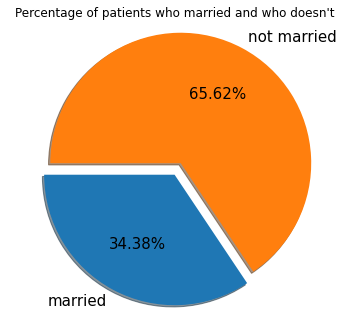

In [ ]:
label_Names = ["married", "not married"]
data = [Num_married, Num_no_married]


explode = (0, 0.15) # Only explode the didn't show up slice.
plt.axis('equal'); # To keep aspect ratio equal to appear as a fine circle.
plt.pie(data,radius=1.5,shadow=True ,labels = label_Names,explode=explode, startangle=180,autopct='%0.2f%%',textprops = {"fontsize":15})
plt.title("Percentage of patients who married and who doesn't",y=1.2);
# Autopct to show percentage, 0.2 for two decimal place

outcome:

1. Percentage of patients who are not married  65.62%

2. Percentage of patients who are married 34.38%

In [ ]:
x=df.groupby(["heart_disease","married"]).count() # Count each gender patients who showed up and who didn't
x.head()

id  gender   age  ...   bmi  smoking_status  stroke
heart_disease married                      ...                              
0             0        3109    3109  3109  ...  3109               0    3109
              1        1725    1725  1725  ...  1725               0    1725
1             0         244     244   244  ...   244               0     244
              1          32      32    32  ...    32               0      32

[4 rows x 10 columns]

Text(0, 0.5, 'count of patients')

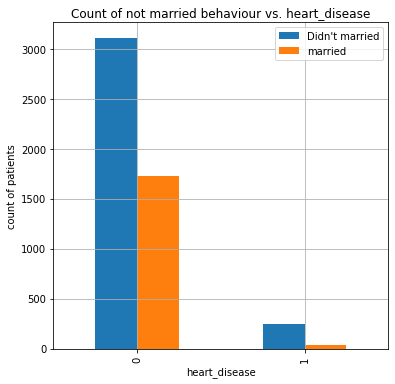

In [ ]:
x["id"].unstack().plot(kind="bar",stacked=False,figsize=(6,6),grid=True) # Plot for the grouped dataframe
plt.title("Count of not married behaviour vs. heart_disease") # Change title for the plot
plt.legend(["Didn't married", "married"]); # Change legend for each color of data
plt.ylabel("count of patients")



In [ ]:
df_heart_disease = df[df["heart_disease"]=="HD"] # new dataframe holds female data only.
Num_HD = df_heart_disease["id"].count() # count of all females in data.

In [ ]:
df_heart_disease_show = df_heart_disease[df_heart_disease["married"] == 1] #new dataframe holds female who showed up only.
Num_HD_show = df_heart_disease_show["married"].sum() #count of females who showed up on their appointments

In [ ]:
# calculate percentage of Heart disease patients who are married among all heartdisease patients in the data
Female_Show_Percent = round((Num_HD_show/Num_HD)*100,2)
print("Percentage of Females who show up on their appointments is around {}% of all female patients.".format(Female_Show_Percent))

Percentage of Females who show up on their appointments is around nan% of all female patients.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in long_scalars
  


In [ ]:
df_heart_disease = df[df["heart_disease"]=="heart_disease"] # New dataframe holds male data only.
Num_heart_disease = df_heart_disease["id"].count() # Count of all males in data.

In [ ]:
df_heart_disease_show = df_heart_disease[df_heart_disease["married"] == 1] # New dataframe holds male who showed up only.
Num_heart_disease_show = df_heart_disease_show["married"].sum() # Count of males who showed up on their appointments

In [ ]:
# Calculate percentage of females who attend their appointments among all females in the data
heart_disease_Show_Percent = round((Num_heart_disease_show/Num_heart_disease)*100,2)
print("Percentage of heart_disease who are married is around {}% of all male patients.".format(heart_disease_Show_Percent))

Percentage of heart_disease who are married is around nan% of all male patients.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in long_scalars
  


Calculate the heartrate from the age 

- HRmax=207-(age)(0.7)




In [ ]:
df["age"] = pd.to_numeric(df["age"])

In [ ]:
# add the feature
df['HRmax'] = 207-((df['age']*0.7))

In [ ]:
df[['HRmax']].sort_values(by=['HRmax'],ascending=True)

,HRmax
42,149.600
4511,149.600
128,149.600
767,149.600
4529,149.600
...,...
3618,206.888
3968,206.888
4021,206.888
3295,206.944


In [ ]:
# check the raws numbers if we drop
del_df = df[(df['HRmax']<206) & (df['HRmax']>130)]
del_df.shape[0:1] 

(5031,)

In [ ]:
# cant be less than 18.5 and more than 40, so drop unreals
df = df[(df['HRmax']<210) & (df['HRmax']>150)]

In [ ]:
# realiztic
df[['HRmax']].sort_values(by=['HRmax'],ascending=True)

,HRmax


In [ ]:
df["gender"].unique()

array([], dtype=object)

In [ ]:
#take the mean of both 1 and 2
a = df[df["gender"]==1]["age"].mean()
b = df[df["gender"]==2]["age"].mean()

# compare
if a > b:
    gender = "male"
    gender1 = "female"
else:
    gender = "female"
    gender1 = "male"
    
print("Gender:1 is "+ gender +" & Gender:2 is " + gender1)

Gender:1 is female & Gender:2 is male


In [ ]:
# use lambda fun. to change the 1,2 to f.m
df['gender'] = df['gender'].apply(lambda x: 'F' if x == 1 else 'M')

In [ ]:
df.gender.value_counts()

M    5031
Name: gender, dtype: int64

In [ ]:
# check the rows and columns
df.shape

(5031, 13)

In [ ]:
# see how much duplicated rows
df.duplicated().sum()

0

My model:
1. Which gender has more has stroke disease?


**First Q**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


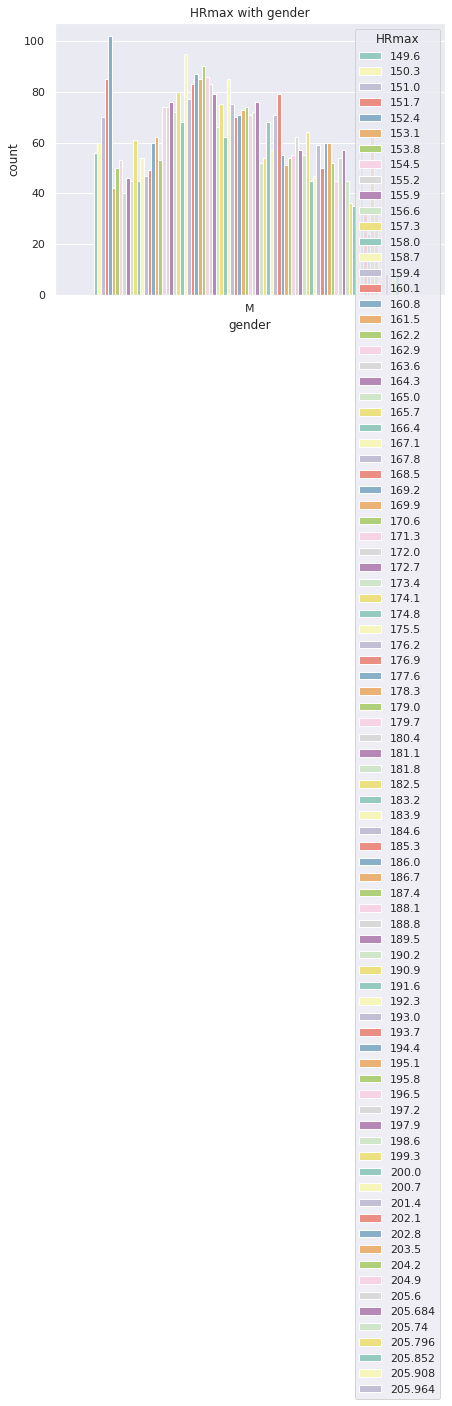

In [ ]:
sns.set_style('whitegrid') #to make white grid in the graph
sns.set(rc={'figure.figsize':(7,5)}) # for edit size
sns.countplot(df.gender,hue=df.HRmax, palette="Set3"); #make the graph
plt.title('HRmax with gender'); # add title

# **Train Test Split**

In [5]:
# modeling imports
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

In [11]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [12]:
# loading the diabetes dataset to a pandas DataFrame
Stroke_dataset = pd.read_csv('Data.csv') 

In [13]:
# printing the first 5 rows of the dataset
Stroke_dataset.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [14]:
# number of rows and Columns in this dataset
Stroke_dataset.shape

(5110, 12)

In [15]:
# getting the statistical measures of the data
Stroke_dataset.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [17]:
Stroke_dataset ['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [19]:
Stroke_dataset.groupby('stroke').mean()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi
stroke,,,,,,
0,36487.236371,41.971545,0.088871,0.047110,104.795513,28.823064
1,37115.068273,67.728193,0.265060,0.188755,132.544739,30.471292


In [20]:
# separating the data and labels
X = Stroke_dataset.drop(columns = 'stroke', axis=1)
Y = Stroke_dataset['stroke']

In [21]:
print(X)

         id  gender   age  ...  avg_glucose_level   bmi   smoking_status
0      9046    Male  67.0  ...             228.69  36.6  formerly smoked
1     51676  Female  61.0  ...             202.21   NaN     never smoked
2     31112    Male  80.0  ...             105.92  32.5     never smoked
3     60182  Female  49.0  ...             171.23  34.4           smokes
4      1665  Female  79.0  ...             174.12  24.0     never smoked
...     ...     ...   ...  ...                ...   ...              ...
5105  18234  Female  80.0  ...              83.75   NaN     never smoked
5106  44873  Female  81.0  ...             125.20  40.0     never smoked
5107  19723  Female  35.0  ...              82.99  30.6     never smoked
5108  37544    Male  51.0  ...             166.29  25.6  formerly smoked
5109  44679  Female  44.0  ...              85.28  26.2          Unknown

[5110 rows x 11 columns]


In [22]:
print(Y)

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64


In [23]:
scaler = StandardScaler()

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [26]:
print(X.shape, X_train.shape, X_test.shape)

(5110, 11) (4088, 11) (1022, 11)
